#  Assignment Overview
You are going to work on the '5G-Energy consumption' dataset that was provided by the  international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

Checkpoint problematic : Network operational expenditure (OPEX) already accounts for around 25 percent of the total telecom operator’s cost, and 90 percent of it is spent on large energy bills. More than 70 percent of this energy is estimated to be consumed by the radio access network (RAN), particularly by the base stations (BSs). Thus, the objective is to build and train a ML model to estimate the energy consumed by different 5G base stations taking into consideration the impact of various engineering configurations, traffic conditions, and energy-saving methods.

Dataset description : This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.

# Import necessary libraries

In [33]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Load the data

In [2]:
df = pd.read_csv("5G_energy_consumption_dataset.csv")

In [3]:
df.head(10)

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
5,20230101 070000,B_0,82.959641,0.351585,0.0,7.101719
6,20230101 080000,B_0,91.031390,0.759298,0.0,7.101719
7,20230101 090000,B_0,78.176383,0.887798,0.0,7.101719
8,20230101 100000,B_0,72.645740,0.624745,0.0,7.101719
9,20230101 140000,B_0,66.666667,0.437926,0.0,7.101719


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [5]:
#checking descriptive statistics
df.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


In [6]:
# checking for missing values
df.isnull().sum()

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64

In [7]:
df.columns

Index(['Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower'], dtype='object')

In [8]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['time', 'bs', 'energy', 'load', 'esmode', 'txpower'], dtype='object')

In [9]:
# extract hour, day, year from time column
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['day'] = pd.to_datetime(df['time']).dt.day

In [10]:
df.head(20)

,time,bs,energy,load,esmode,txpower,hour,day
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719,1,1
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719,2,1
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719,3,1
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719,4,1
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719,5,1
5,20230101 070000,B_0,82.959641,0.351585,0.0,7.101719,7,1
6,20230101 080000,B_0,91.031390,0.759298,0.0,7.101719,8,1
7,20230101 090000,B_0,78.176383,0.887798,0.0,7.101719,9,1
8,20230101 100000,B_0,72.645740,0.624745,0.0,7.101719,10,1
9,20230101 140000,B_0,66.666667,0.437926,0.0,7.101719,14,1


In [11]:
df.describe()

,energy,load,esmode,txpower,hour,day
count,92629.000000,92629.000000,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427,11.576752,3.539410
std,13.934645,0.234677,0.382317,0.309929,6.894317,1.830907
min,0.747384,0.000000,0.000000,5.381166,0.000000,1.000000
25%,18.236173,0.057370,0.000000,6.427504,6.000000,2.000000
50%,24.065770,0.165550,0.000000,6.875934,12.000000,3.000000
75%,35.724963,0.363766,0.000000,6.875934,18.000000,5.000000
max,100.000000,0.993957,4.000000,8.375336,23.000000,8.000000


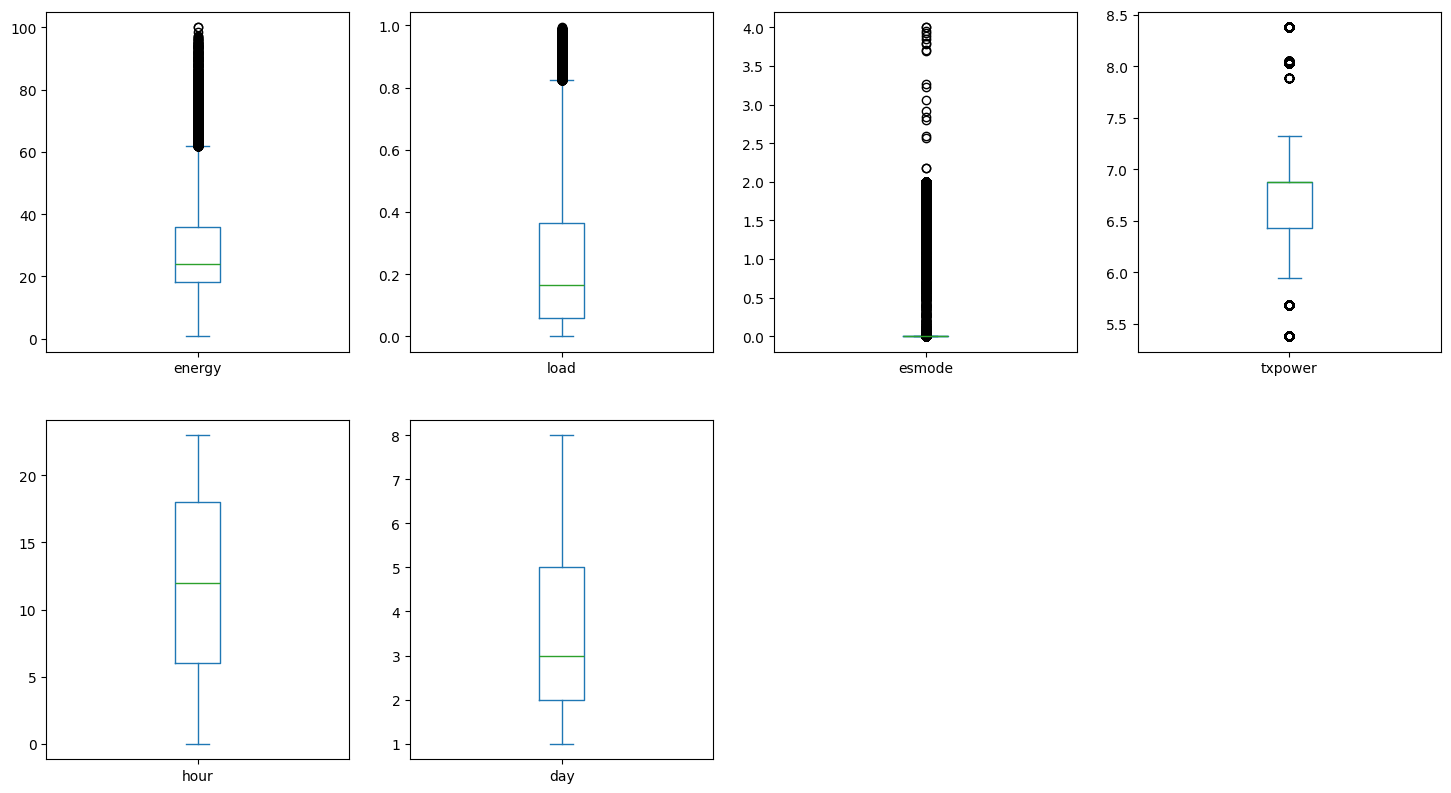

In [12]:
# checking for outliers
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
#plt.savefig('california housing outliers.png')
plt.show()

<Axes: xlabel='energy', ylabel='Count'>

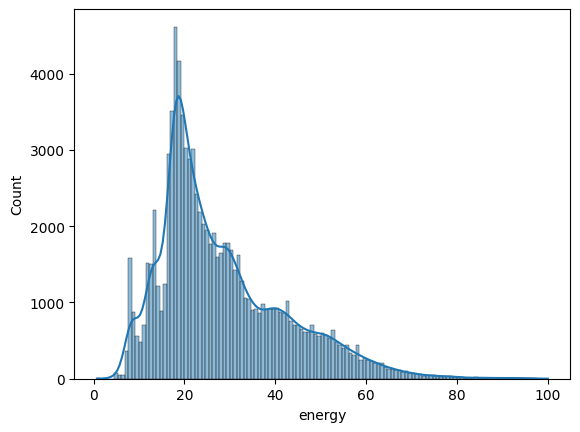

In [13]:
# see distribution of the energy column
sns.histplot(data=df.energy, kde=True)

For the energy column the distribution is skewed to the left and therefore will used Inter Quartile Range(IQR) to deal with outliers.

<Axes: xlabel='load', ylabel='Count'>

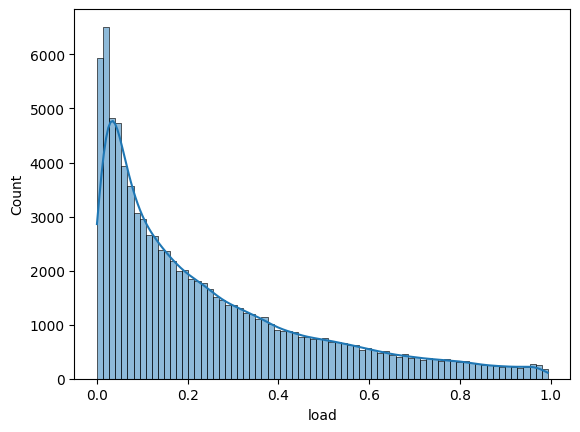

In [14]:
# visualize histplot of load column to check the distribution before handling outliers

sns.histplot(data=df.load, kde=True)

The load column also has a left-skewed distribution

<Axes: xlabel='esmode', ylabel='Count'>

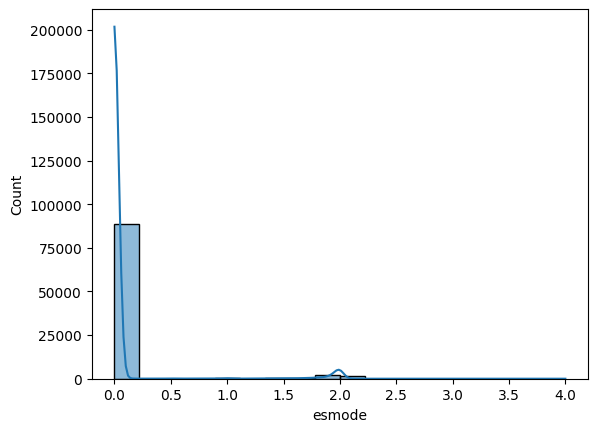

In [15]:
# visualize  to check the distribution before handling outliers

sns.histplot(data=df.esmode, kde=True)

<Axes: xlabel='txpower', ylabel='Count'>

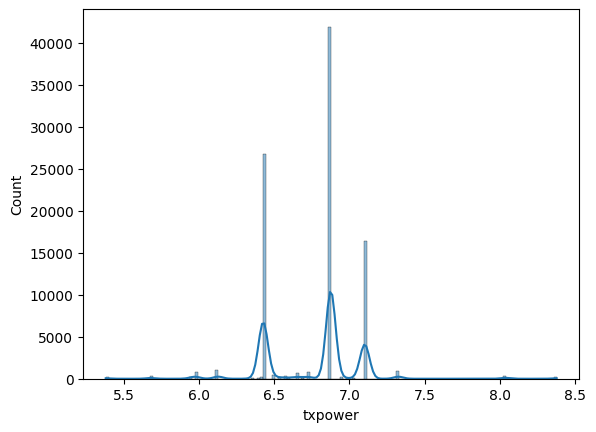

In [16]:
# visualize txpower column to check the distribution before handling outliers
sns.histplot(data=df.txpower, kde=True)

# Removing the outliers using the Inter Quartile Range

In [17]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper limit
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Filter the dataframe to remove outliers
    filtered_df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return filtered_df

# List of columns to remove outliers from
columns = ['txpower', 'load']

# Apply the IQR method for each column and update the dataframe
for column in columns:
    df = remove_outliers_iqr(df, column)

In [18]:
# Check the shape of the dataframe after removing outliers
df.shape

(88594, 8)

In [19]:
df.head()

,time,bs,energy,load,esmode,txpower,hour,day
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719,1,1
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719,2,1
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719,3,1
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719,4,1
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719,5,1


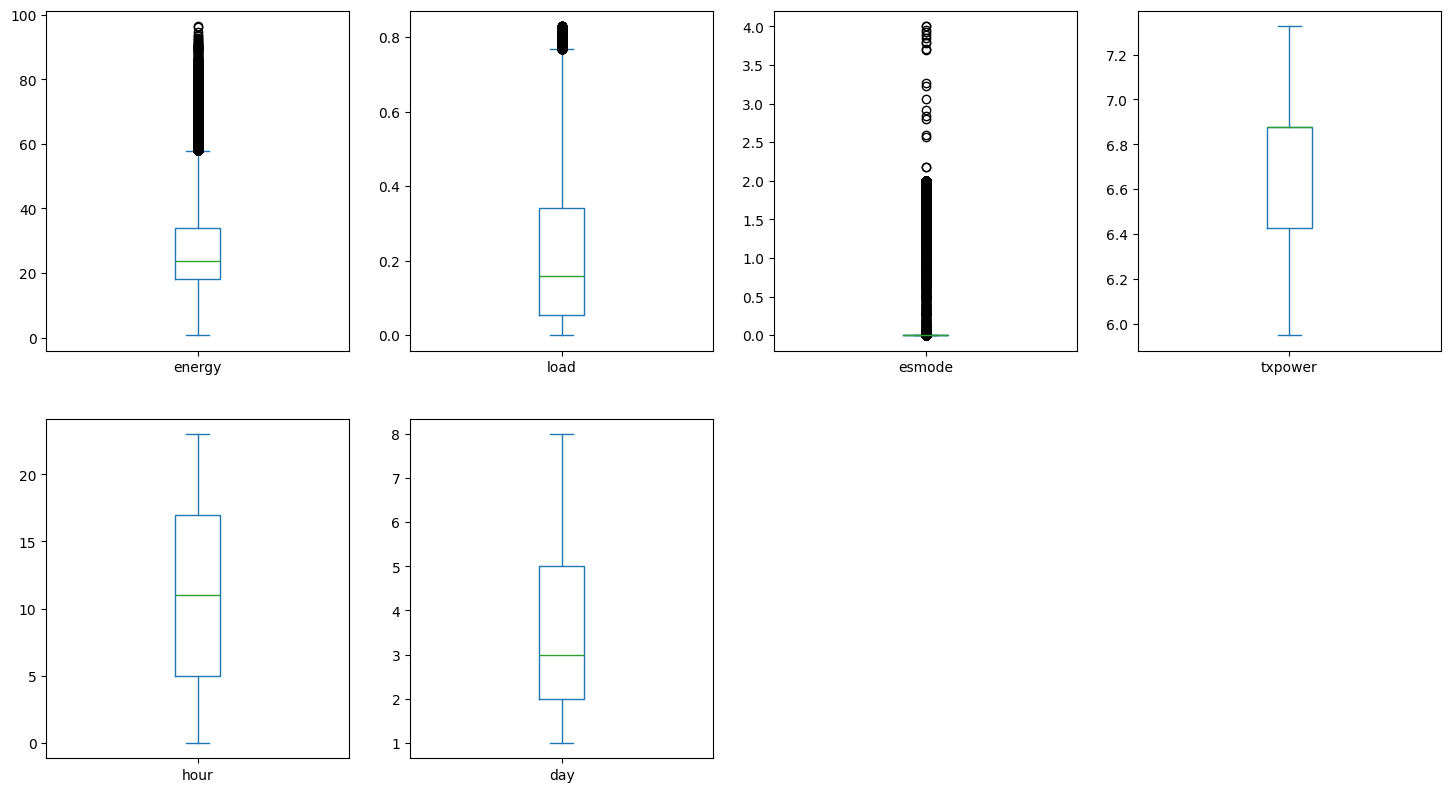

In [20]:
# checking for outliers
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
#plt.savefig('california housing outliers.png')
plt.show()

## Capping the remaining outliers in the load and energy columns

In [21]:
# Function to cap outliers using the IQR method
def cap_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper limit
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Cap the values below the lower bound
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    # Cap the values above the upper bound
    df[column] = df[column].apply(lambda x: upper_limit if x > upper_limit else x)

    return df

# List of columns to cap outliers in
columns_to_cap = ['load']

# Apply the capping function for the specified columns
for column in columns_to_cap:
    df = cap_outliers_iqr(df, column)

In [22]:
# Check the dataframe after capping outliers
df[columns_to_cap].describe()

,load
count,88594.000000
mean,0.223792
std,0.204641
min,0.000000
25%,0.055050
50%,0.157912
75%,0.339947
max,0.767294


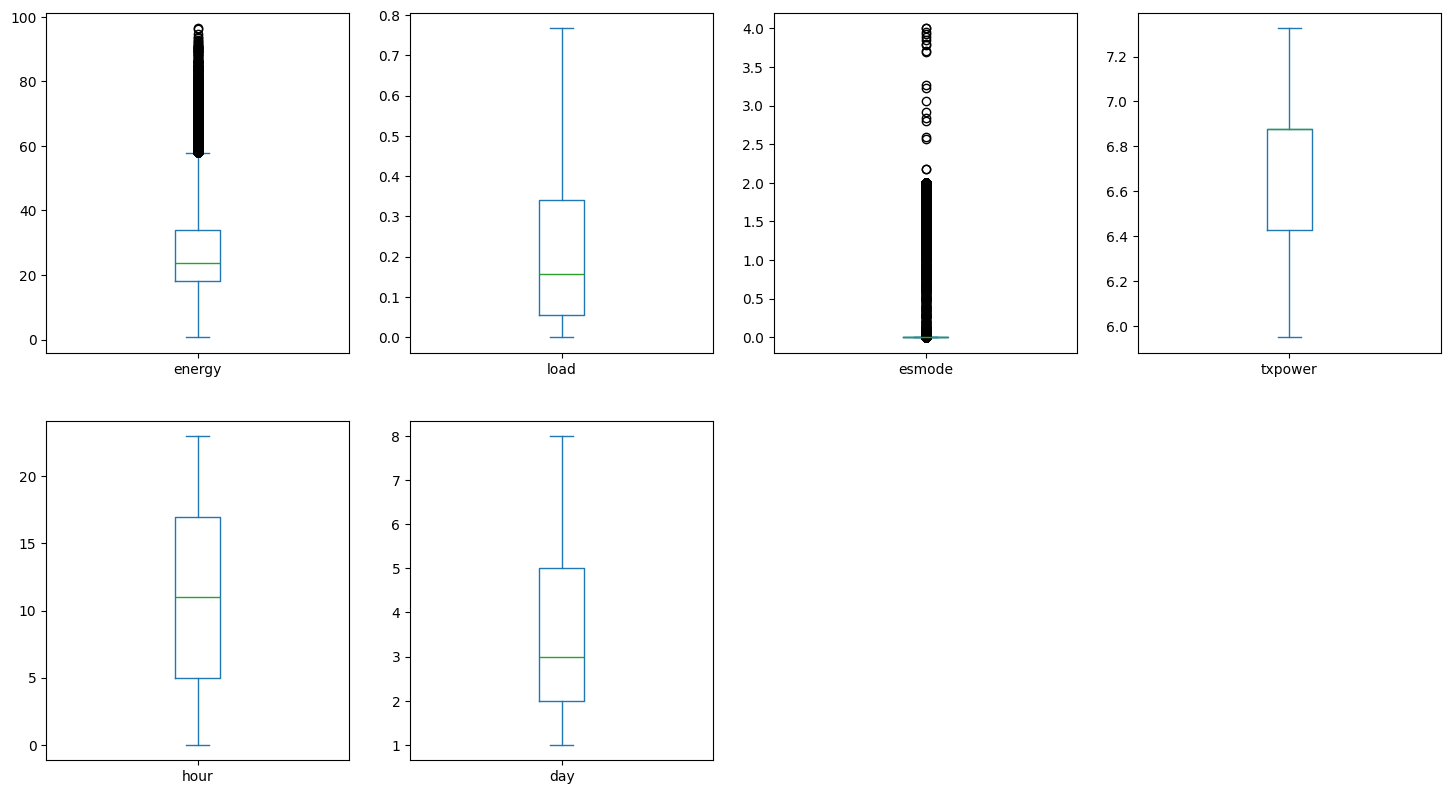

In [23]:
# checking for outliers
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,4))
#plt.savefig('california housing outliers.png')
plt.show()

## removing outliers in the esmode column using imputation

In [ ]:
# Calculate the mode of the 'esmode' column
#esmode_mode = df['esmode'].mode()[0]
#esmode_mode

In [ ]:
# Replace outliers (values outside the range 0-4) with the mode
#df['esmode'] = df['esmode'].apply(lambda x: esmode_mode if x < 0 or x > 4 else x)

In [ ]:
# Check the unique values to verify no outliers remain
#print(df['esmode'].unique())

In [ ]:
df.head()

since esmode column has discrete column we use a countplot to check for outliers

## Check the correlation between the features and target variable

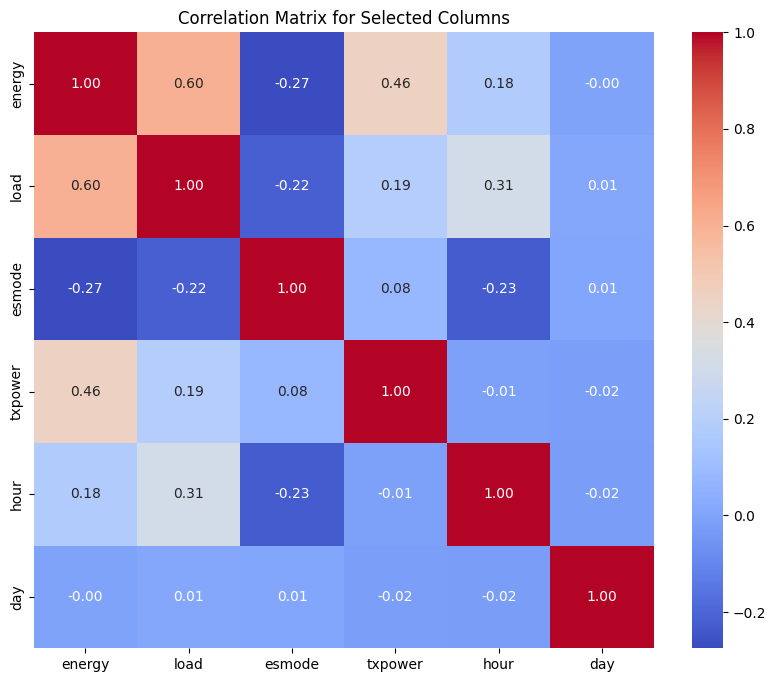

In [24]:
# Select specific columns for the correlation matrix
columns_to_correlate = ['energy', 'load', 'esmode', 'txpower', 'hour', 'day']

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[columns_to_correlate].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Selected Columns")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='energy', data=df)
plt.title('Energy Consumption vs Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption')
plt.show()


# 2. Selecting target variable and the features

In [25]:
#Select the specified feature columns

X = df[['load', 'txpower', 'hour']]

# Select the target column
y = df['energy']

# 3. Split the dataset into training and test sets

In [26]:
# split the data as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# check the splitted data is the same size
print("X_train:", X_train.shape)  
print("X_test:",  X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (70875, 3)
X_test: (17719, 3)
y_train: (70875,)
y_test: (17719,)


# 4. Linear Regression model

In [28]:
# Create a linear regression model
model = LinearRegression()

In [29]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# 5. Evaluate the model

In [31]:
#Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred) 

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)  

# calculate R squared
r2 = r2_score(y_test , y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f" r squared (r2): {r2}")

Mean Squared Error (MSE): 91.03776859753707
Root Mean Squared Error (RMSE): 9.541371421212837
 r squared (r2): 0.4810837144461766


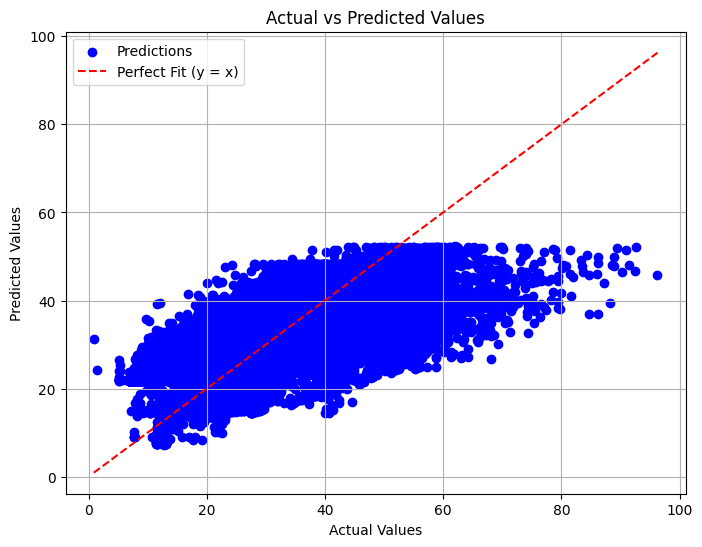

In [32]:
# Plot actual vs predicted  values
# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", label="Predictions")
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    label="Perfect Fit (y = x)",
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)

plt.show()

With an R-squared of 48% the linear regression model was only able to explain 48% of the variability of the energy consumption and that is very poor performance